In [89]:
%matplotlib notebook
import random
import datetime
import matplotlib.pyplot as plt
from collections import Counter
import math
import collections

from lib.es import *

In [10]:
DATA_PATH = "data/geolife_trajectories/"

# Description des données

- Combien d'utilisateurs ? 182
- Lieu ? Principalement à Beijing. Quelques villes en dehors de Chine.
- Un fichier par jour ? Non, exemple : utilisateur 000 a 2 fichiers 20081029* => parfois plusieurs fichiers par jour, et souvent des jours sans fichier
- Un trajet peut-il être coupé en 2 entre 2 fichiers ? Oui, pour l'utilisateur 000 le fichier 20081029092138 termine à 9:30:28 et le fichier 20081029093038 commence à 9:30:38
- Le relevé de position est il régulier au sein d'un fichier ? Non. Exemple : utilisateur 123, fichier 20090924183029 relevé toutes les 5 secondes de 18h30 à 19h, puis saut jusqu'à 19h34   
- Est-ce-que les relevés de position, et les fichiers plt sont dans l'ordre (temporel) ? 
- Quelle est la durée de participation des utilisateurs au programme, quelle est la durée cumulée de leurs trajets enregistrés ? Variable cf user-guide.

- Combien d'utilisateurs ? 182 d'après le user-guide, qui correspondent aux dossier "000", "001"…

In [3]:
! ls $DATA_PATH | head -5

000
001
002
003
004


In [4]:
! expr `ls -l $DATA_PATH | wc -l` - 1

182


- Le relevé de position est il régulier au sein d'un fichier ? Non. Exemple : utilisateur 123, fichier 20090924183029 relevé toutes les 5 secondes de 18h30 à 19h, puis saut jusqu'à 19h34 

<IPython.core.display.Javascript object>


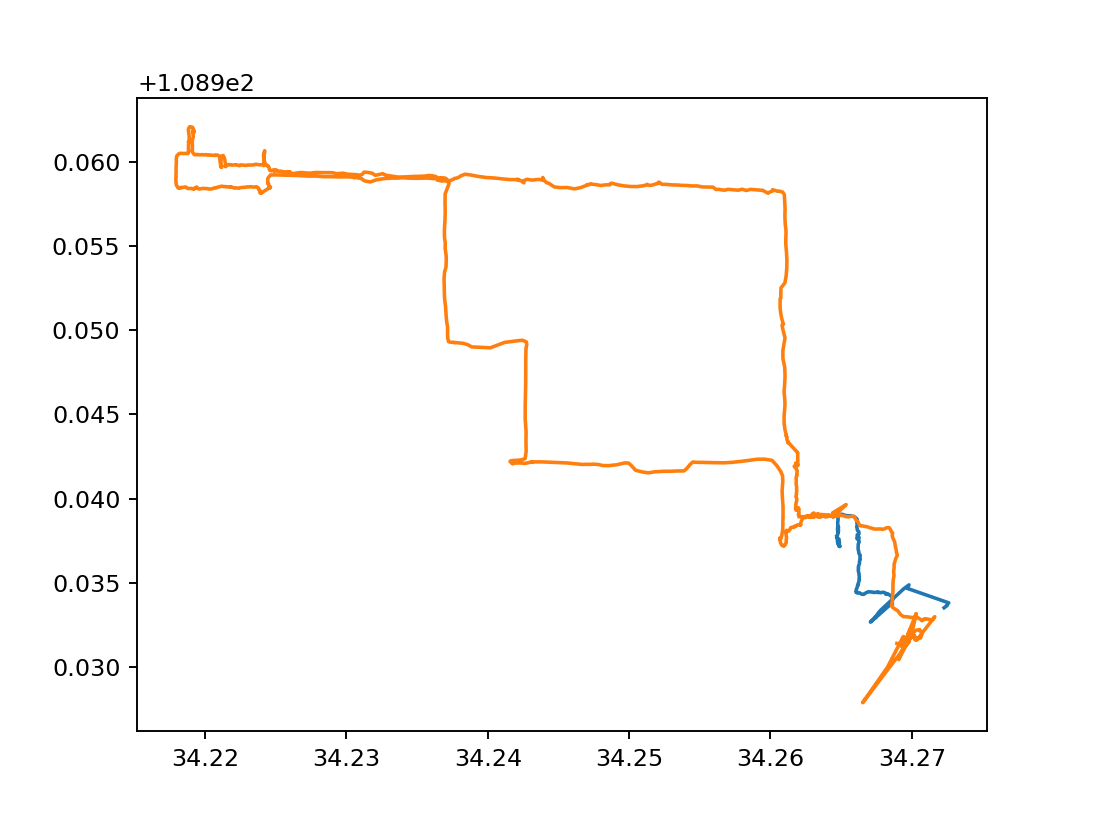

In [6]:
points = ouvrir_plt(DATA_PATH+"123/Trajectory/"+"20090924183029.plt")
plt.figure(1)
plt.plot(points[0][:271], points[1][:271])
plt.plot(points[0][271:], points[1][271:])
plt.show()

# Entropies

In [11]:
from scipy.stats import entropy
import numpy as np
import csv
import time

In [12]:
start_time = time.time()
pos, dates = ouvrir_utilisateurs(DATA_PATH)
print("--- %s seconds ---" % (time.time() - start_time))

--- 104.62053227424622 seconds ---


In [13]:
def entropie(vect):
    hY = 0
    ctr = Counter()
    for i in vect:
        ctr[i] += 1
    for y in ctr:
        hY -= ctr[y]/len(vect)*math.log(ctr[y]/len(vect), 2)
    return hY

In [43]:
def entropie_2D(vect):
    hY = 0
    ctr = Counter()
    for i in vect:
        ctr[tuple(i)] += 1
    for y in ctr:
        hY -= ctr[y]/len(vect)*math.log(ctr[y]/len(vect), 2)
    return hY

## Entropie spatiale
### Sur les données telles quelles
#### Latitude uniquement

In [14]:
entropies = {}
for key, value in pos.items():
    print(key, end=' ')
    entropies[key] = entropie(value[:, 0])

000 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018 019 020 021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053 054 055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089 090 091 092 093 094 095 096 097 098 099 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 

<IPython.core.display.Javascript object>


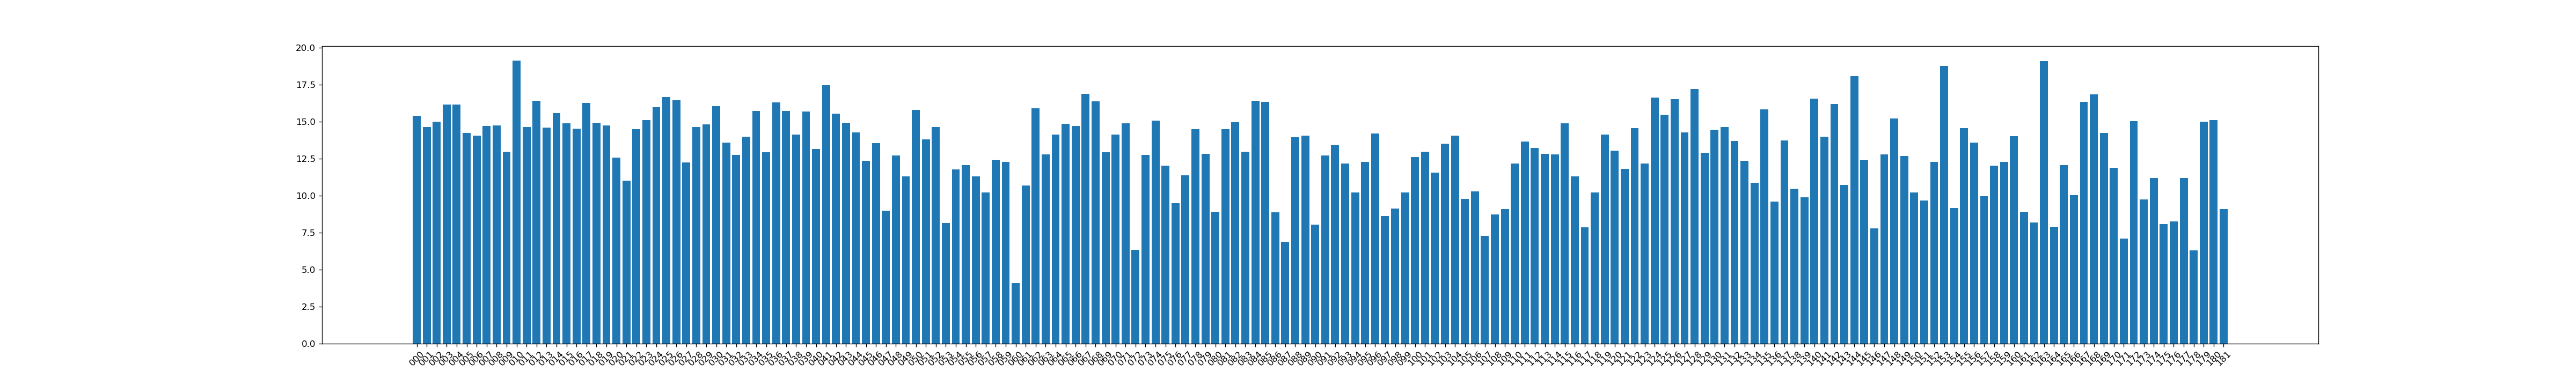

In [25]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(entropies)), list(entropies.values()), align='center')
plt.xticks(range(len(entropies)), list(entropies.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_latitude", format="jpg")

In [26]:
ordered_entropies = collections.OrderedDict(sorted(entropies.items(), key=lambda t: t[1]))

<IPython.core.display.Javascript object>


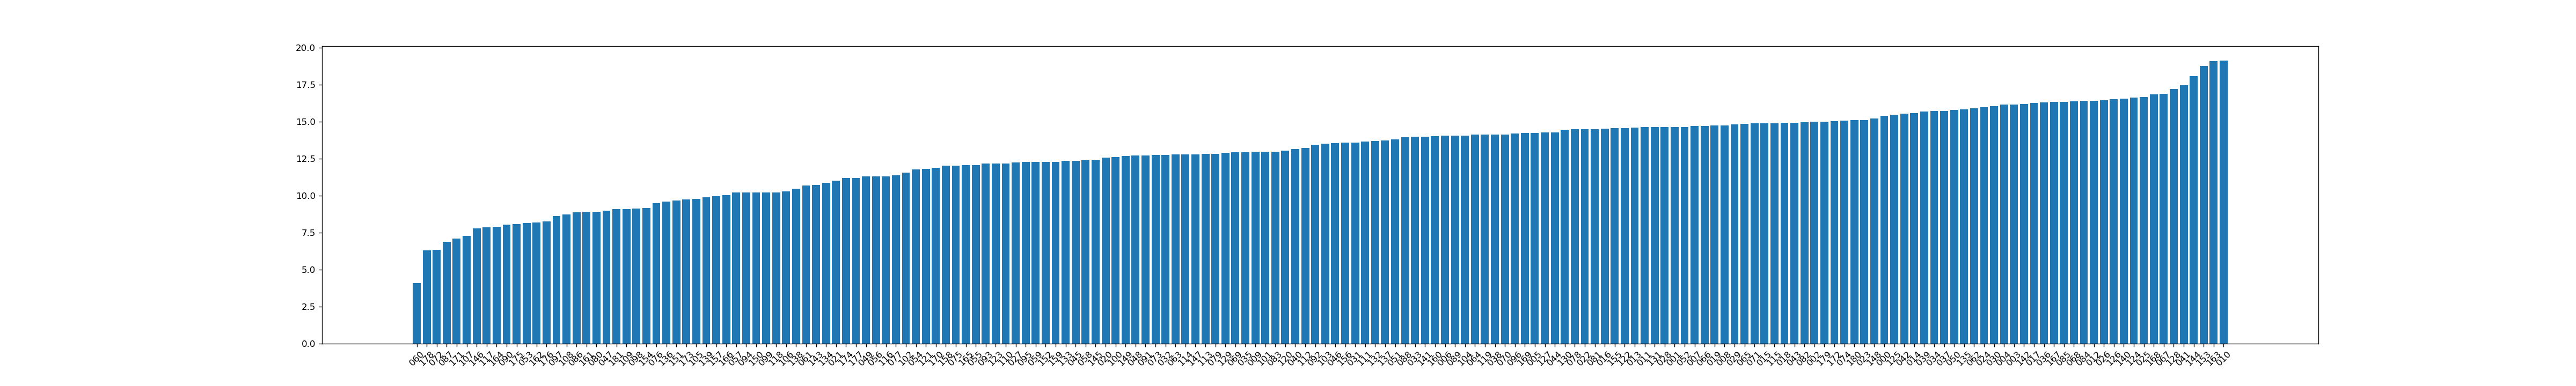

In [28]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(ordered_entropies)), list(ordered_entropies.values()), align='center')
plt.xticks(range(len(ordered_entropies)), list(ordered_entropies.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_latitude_sorted", format="jpg")

In [54]:
entropies['060']

4.08746284125034

<IPython.core.display.Javascript object>


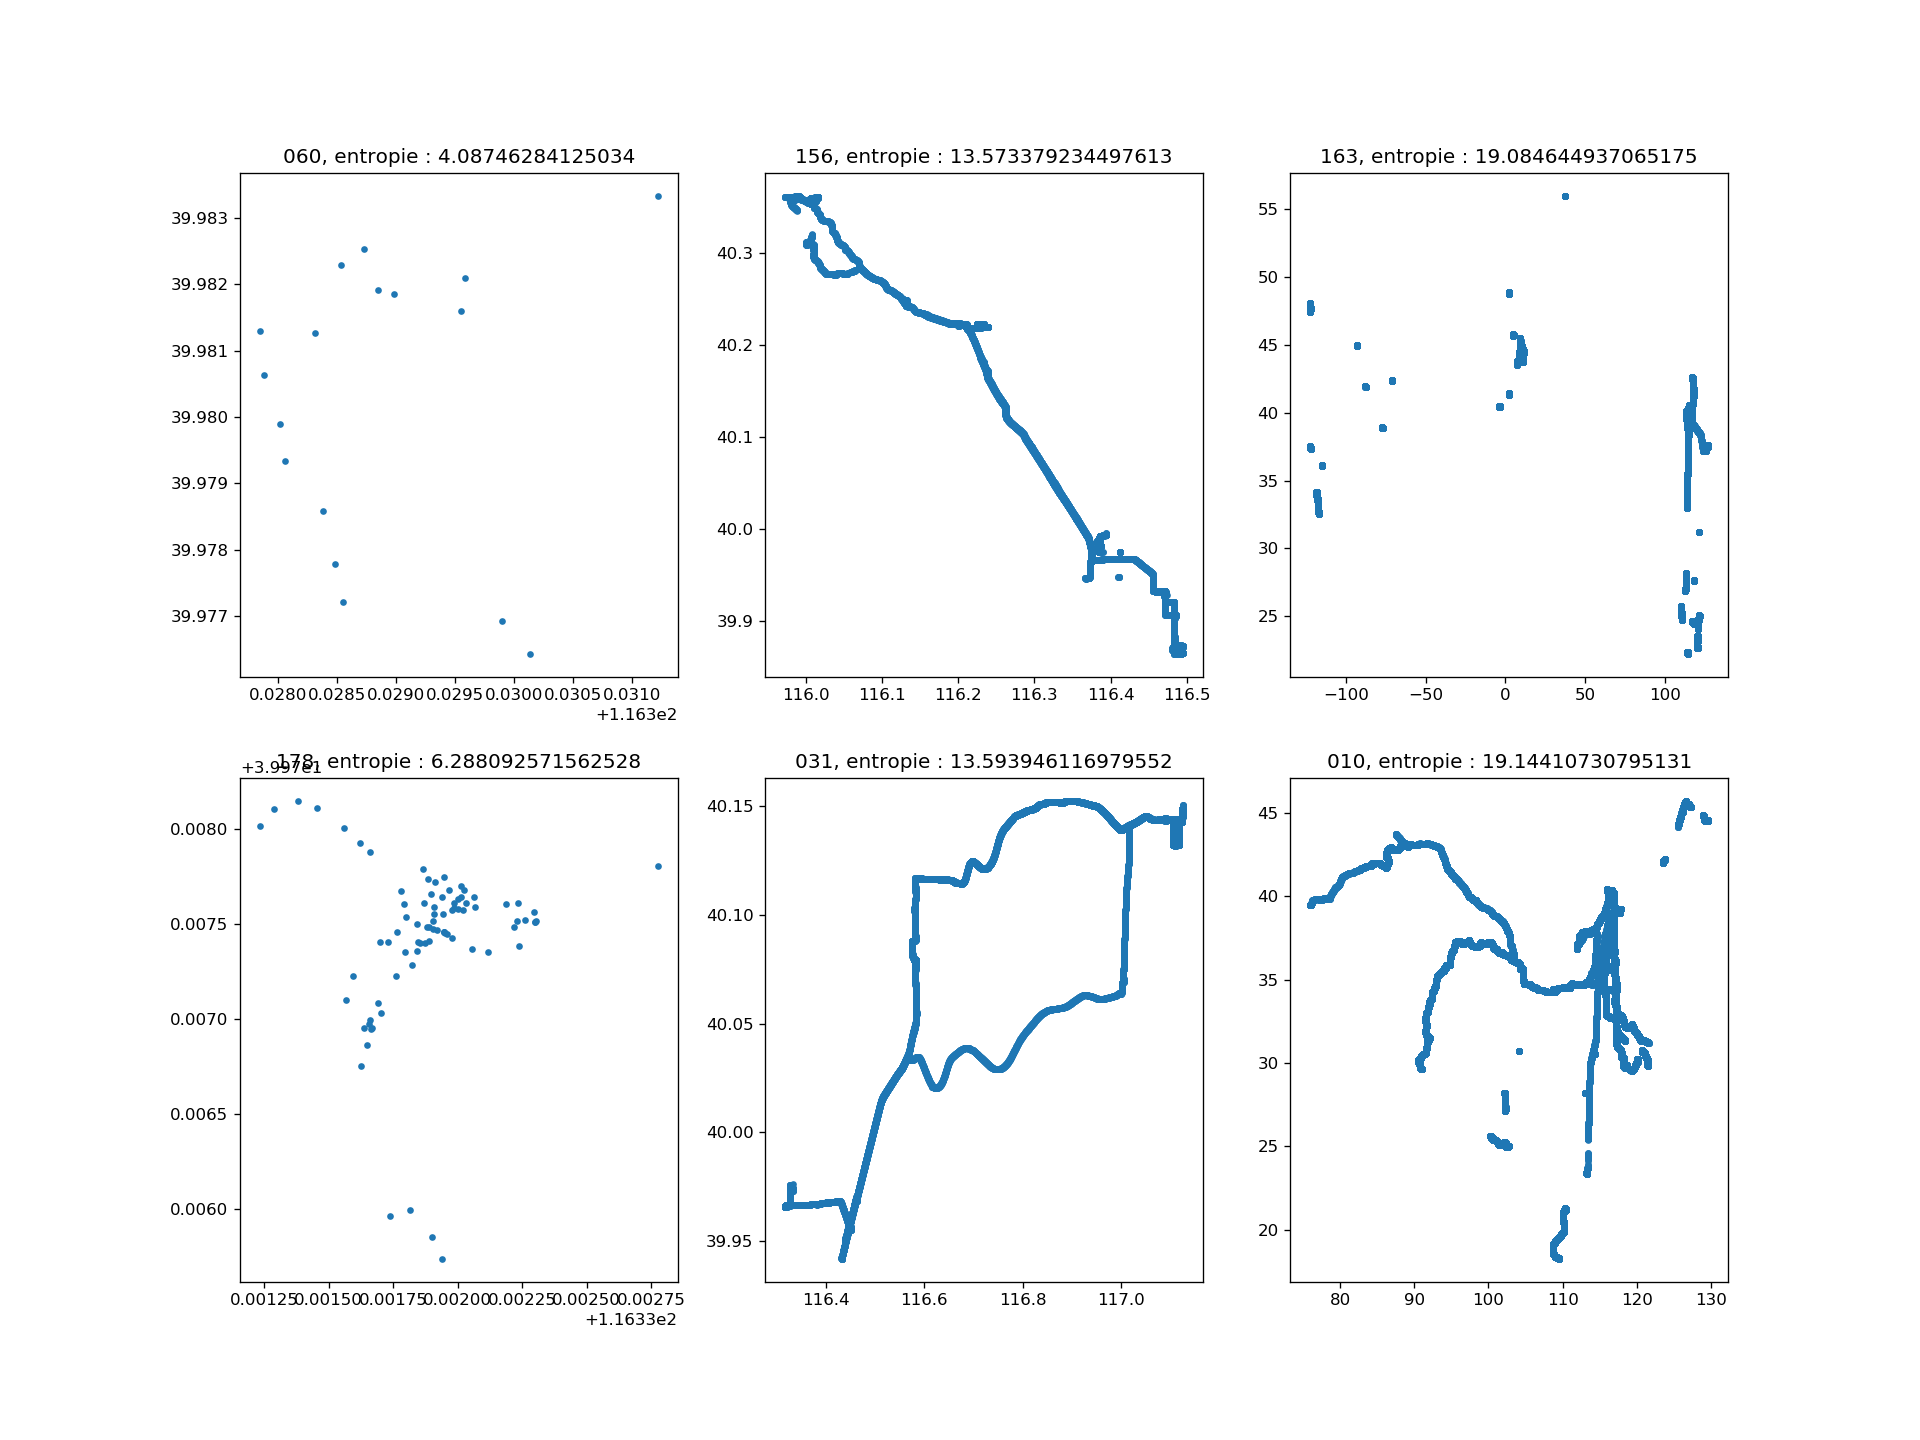

In [65]:
plt.figure(num=None, figsize=(16, 12))
plt.subplot(2,3,1)
plt.title("060, entropie : "+str(entropies['060']))
plt.plot(pos['060'][:, 1], pos['060'][:, 0], '.')
plt.subplot(2,3,4)
plt.title("178, entropie : "+str(entropies['178']))
plt.plot(pos['178'][:, 1], pos['178'][:, 0], '.')
plt.subplot(2,3,2)
plt.title("156, entropie : "+str(entropies['156']))
plt.plot(pos['156'][:, 1], pos['156'][:, 0], '.')
plt.subplot(2,3,5)
plt.title("031, entropie : "+str(entropies['031']))
plt.plot(pos['031'][:, 1], pos['031'][:, 0], '.')
plt.subplot(2,3,3)
plt.title("163, entropie : "+str(entropies['163']))
plt.plot(pos['163'][:, 1], pos['163'][:, 0], '.')
plt.subplot(2,3,6)
plt.title("010, entropie : "+str(entropies['010']))
plt.plot(pos['010'][:, 1], pos['010'][:, 0], '.')
plt.savefig("output/entropie_spatiale_latitude_points_users_extremes", format="jpg")

<IPython.core.display.Javascript object>


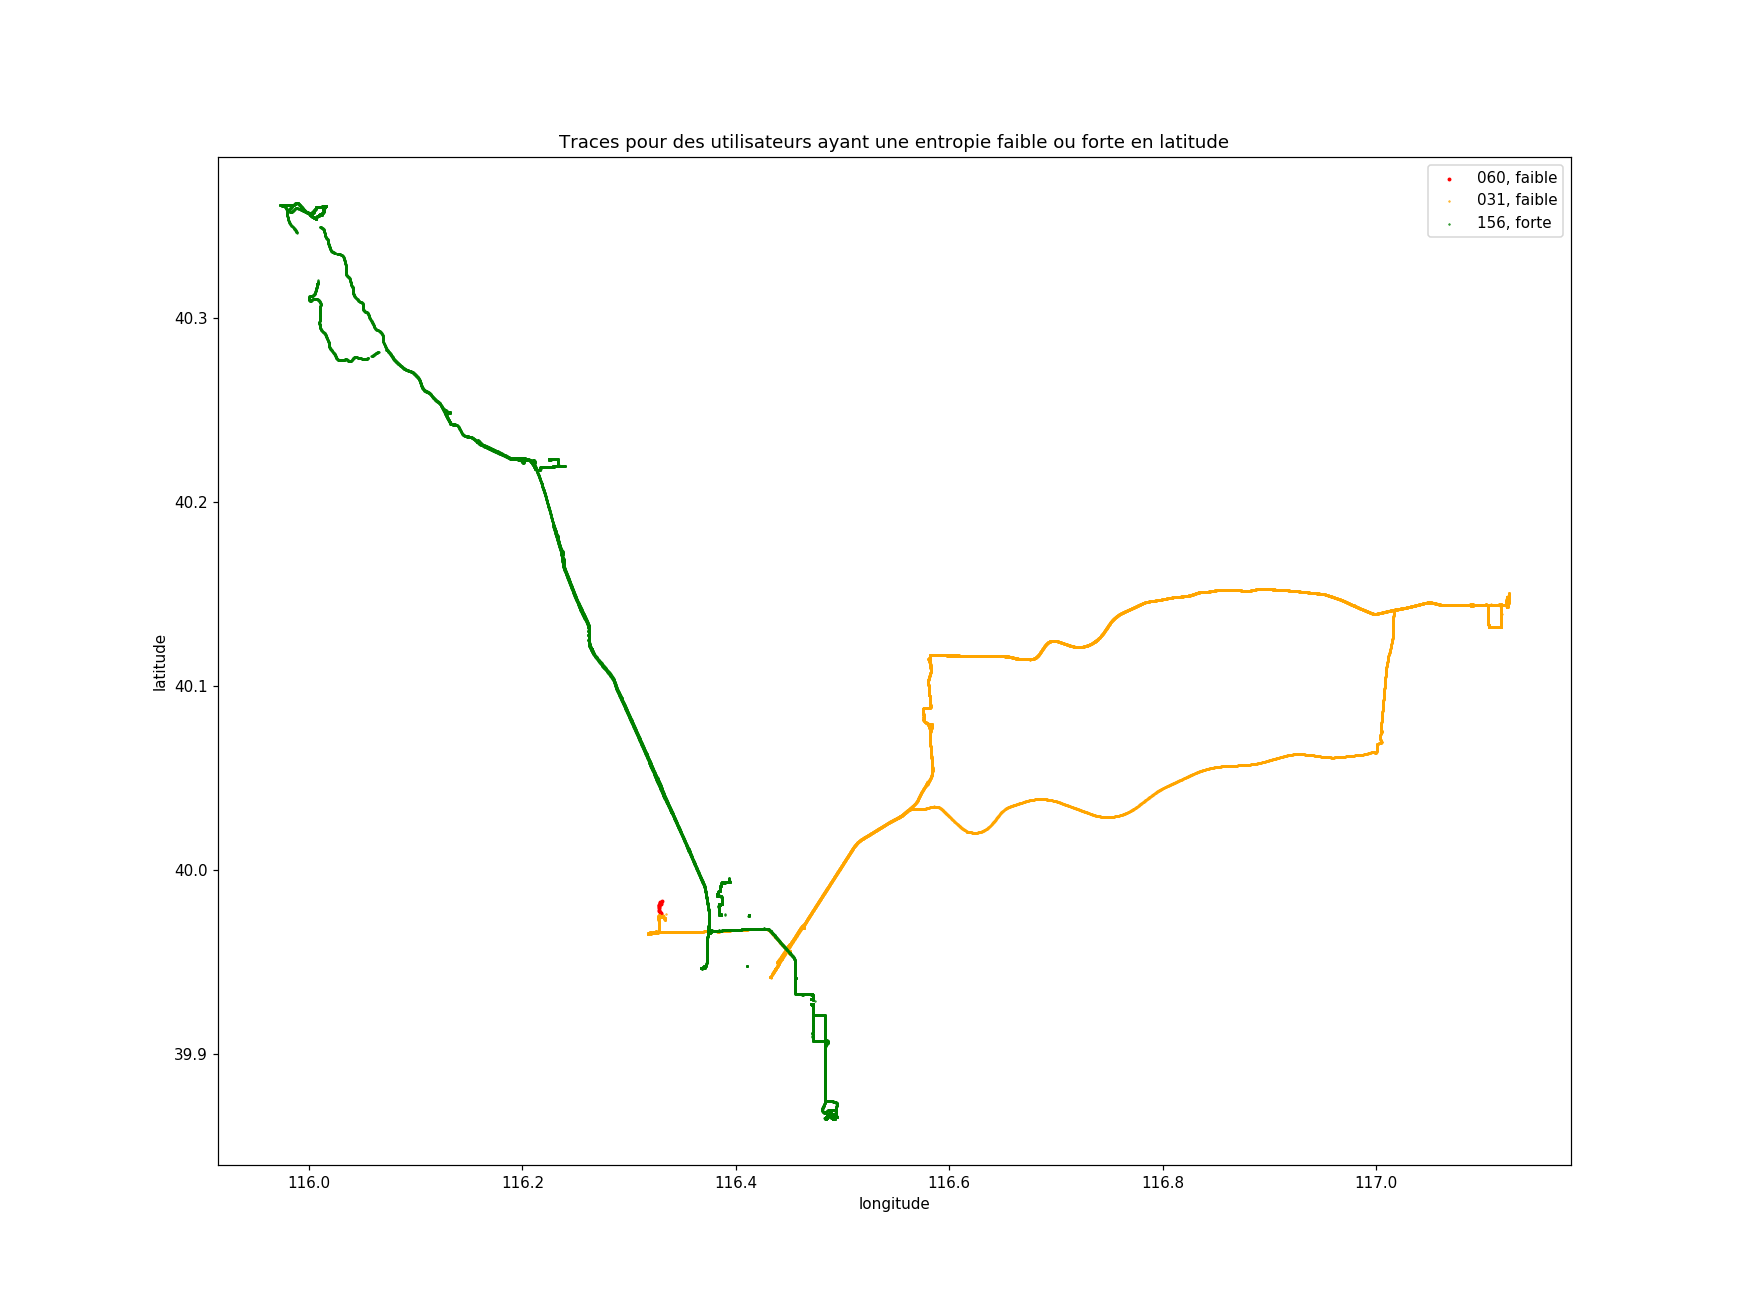

In [142]:
fig = plt.figure(num=None, figsize=(16,12))
ax1 = fig.add_subplot(111)

ax1.scatter(pos['060'][:, 1], pos['060'][:, 0], marker='.', s=10, c='r', label='060, faible')
ax1.scatter(pos['031'][:, 1], pos['031'][:, 0], marker='.', s=1, c='orange', label='031, faible')
ax1.scatter(pos['156'][:, 1], pos['156'][:, 0], marker='.', s=1, c='g', label='156, forte')
#ax1.scatter(pos['010'][:, 1], pos['010'][:, 0], s=1, c='b', label='010, forte')
plt.legend(loc='upper right');
plt.title('Traces pour des utilisateurs ayant une entropie faible ou forte en latitude')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.savefig("output/scatterplot_faible_vs_forte_entropie_latitude")
plt.show()

#### Latitude + longitude

In [72]:
entropies_b = {}
for key, value in pos.items():
    print(key, end=' ')
    entropies_b[key] = entropie_2D(value)

000 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018 019 020 021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053 054 055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089 090 091 092 093 094 095 096 097 098 099 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 

<IPython.core.display.Javascript object>


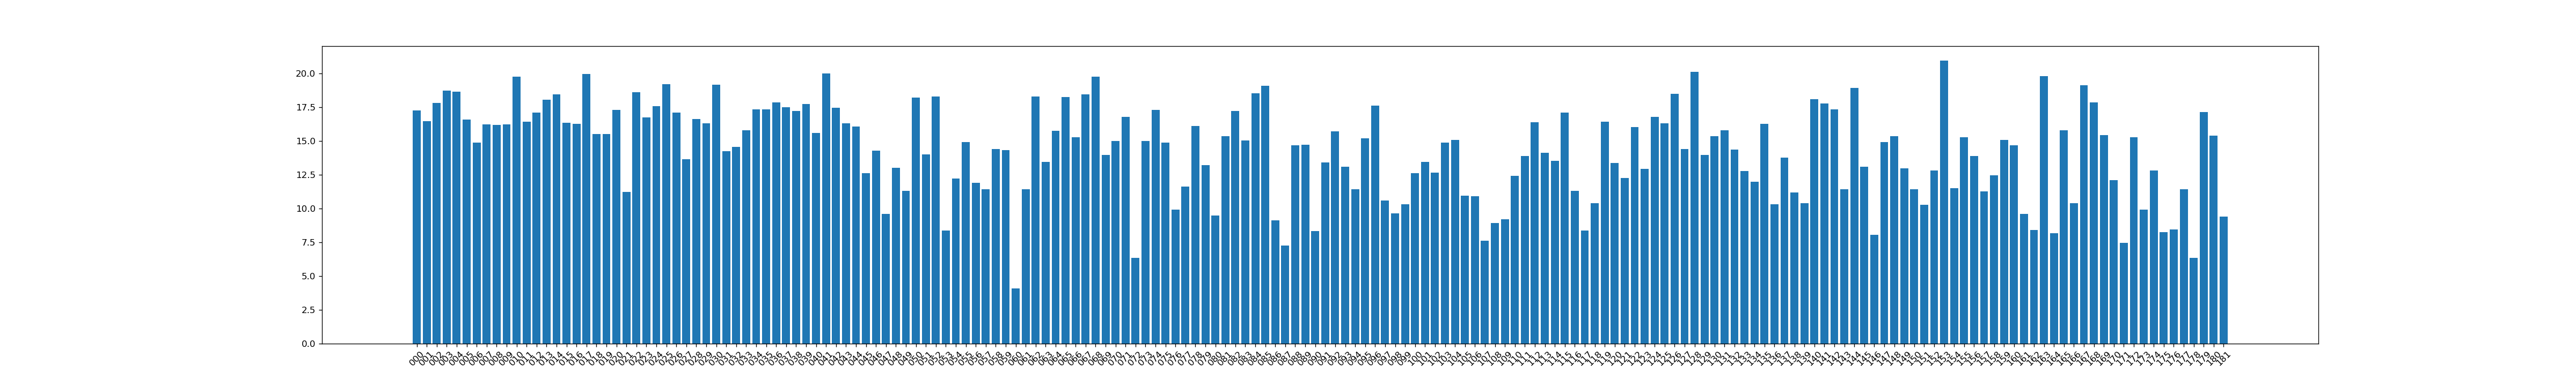

In [59]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(entropies_b)), list(entropies_b.values()), align='center')
plt.xticks(range(len(entropies_b)), list(entropies_b.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_both", format="jpg")

In [60]:
ordered_entropies_b = collections.OrderedDict(sorted(entropies_b.items(), key=lambda t: t[1]))

<IPython.core.display.Javascript object>


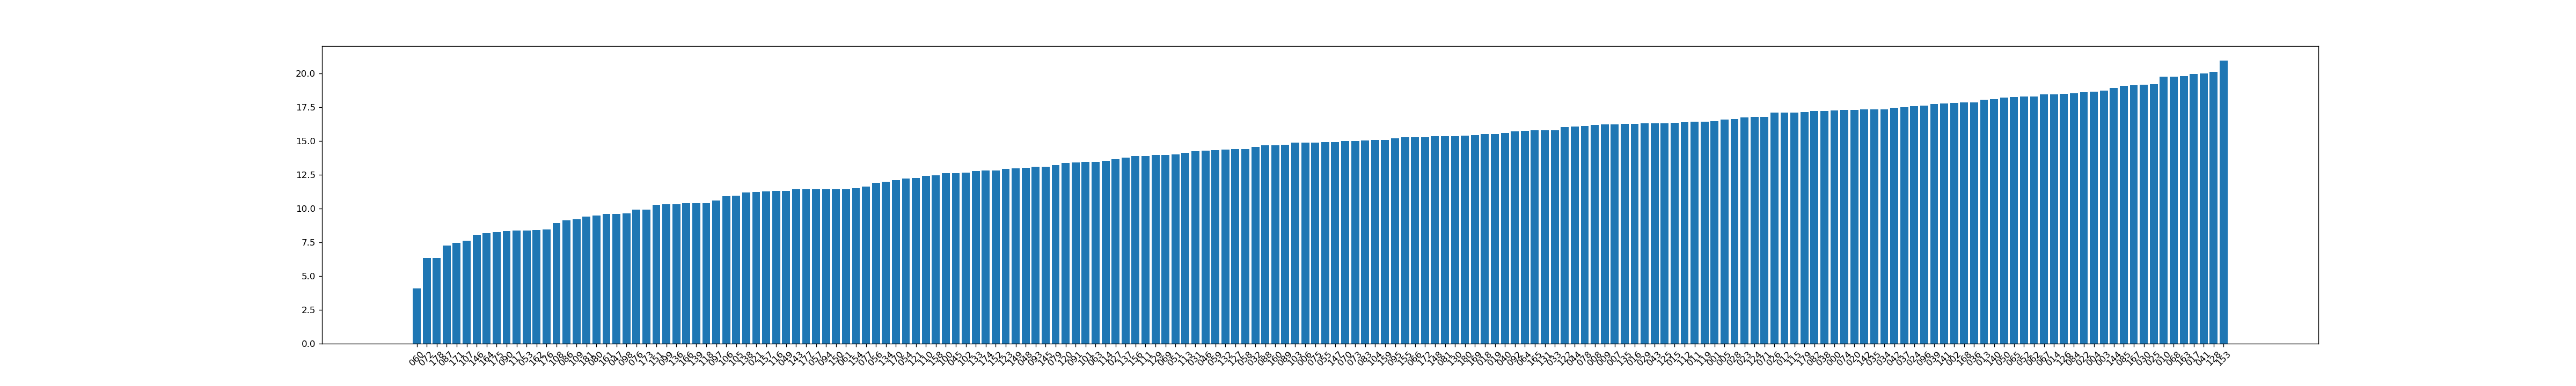

In [61]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(ordered_entropies_b)), list(ordered_entropies_b.values()), align='center')
plt.xticks(range(len(ordered_entropies_b)), list(ordered_entropies_b.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_sorted_both", format="jpg")

<IPython.core.display.Javascript object>


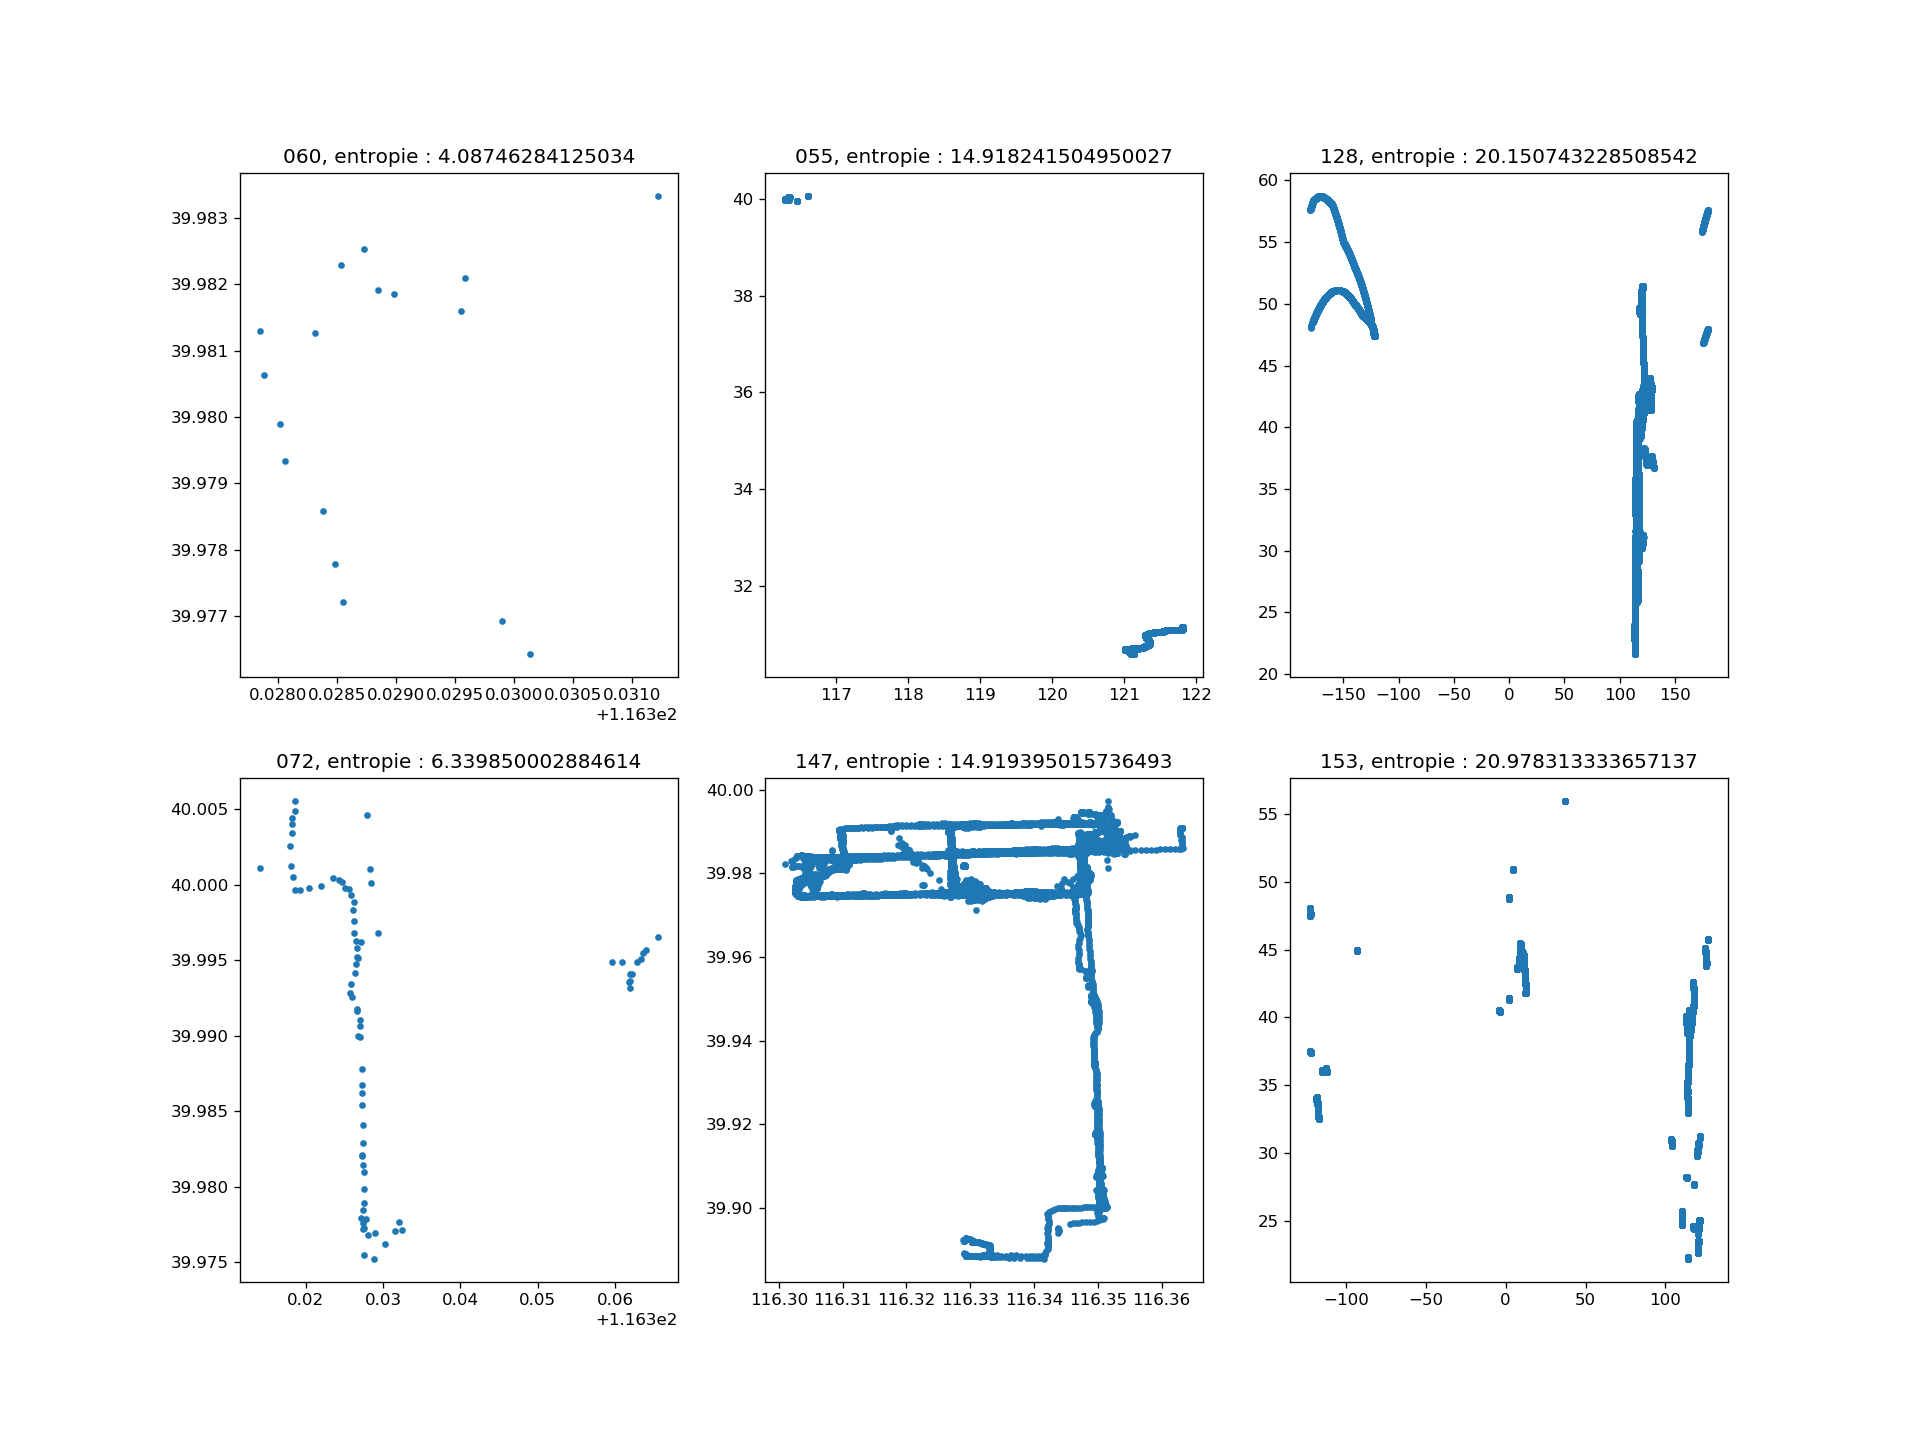

In [64]:
plt.figure(num=None, figsize=(16, 12))
plt.subplot(2,3,1)
plt.title("060, entropie : "+str(entropies_b['060']))
plt.plot(pos['060'][:, 1], pos['060'][:, 0], '.')
plt.subplot(2,3,4)
plt.title("072, entropie : "+str(entropies_b['072']))
plt.plot(pos['072'][:, 1], pos['072'][:, 0], '.')
plt.subplot(2,3,2)
plt.title("055, entropie : "+str(entropies_b['055']))
plt.plot(pos['055'][:, 1], pos['055'][:, 0], '.')
plt.subplot(2,3,5)
plt.title("147, entropie : "+str(entropies_b['147']))
plt.plot(pos['147'][:, 1], pos['147'][:, 0], '.')
plt.subplot(2,3,3)
plt.title("128, entropie : "+str(entropies_b['128']))
plt.plot(pos['128'][:, 1], pos['128'][:, 0], '.')
plt.subplot(2,3,6)
plt.title("153, entropie : "+str(entropies_b['153']))
plt.plot(pos['153'][:, 1], pos['153'][:, 0], '.')
plt.savefig("output/entropie_spatiale_both_points_users_extremes", format="jpg")

<IPython.core.display.Javascript object>


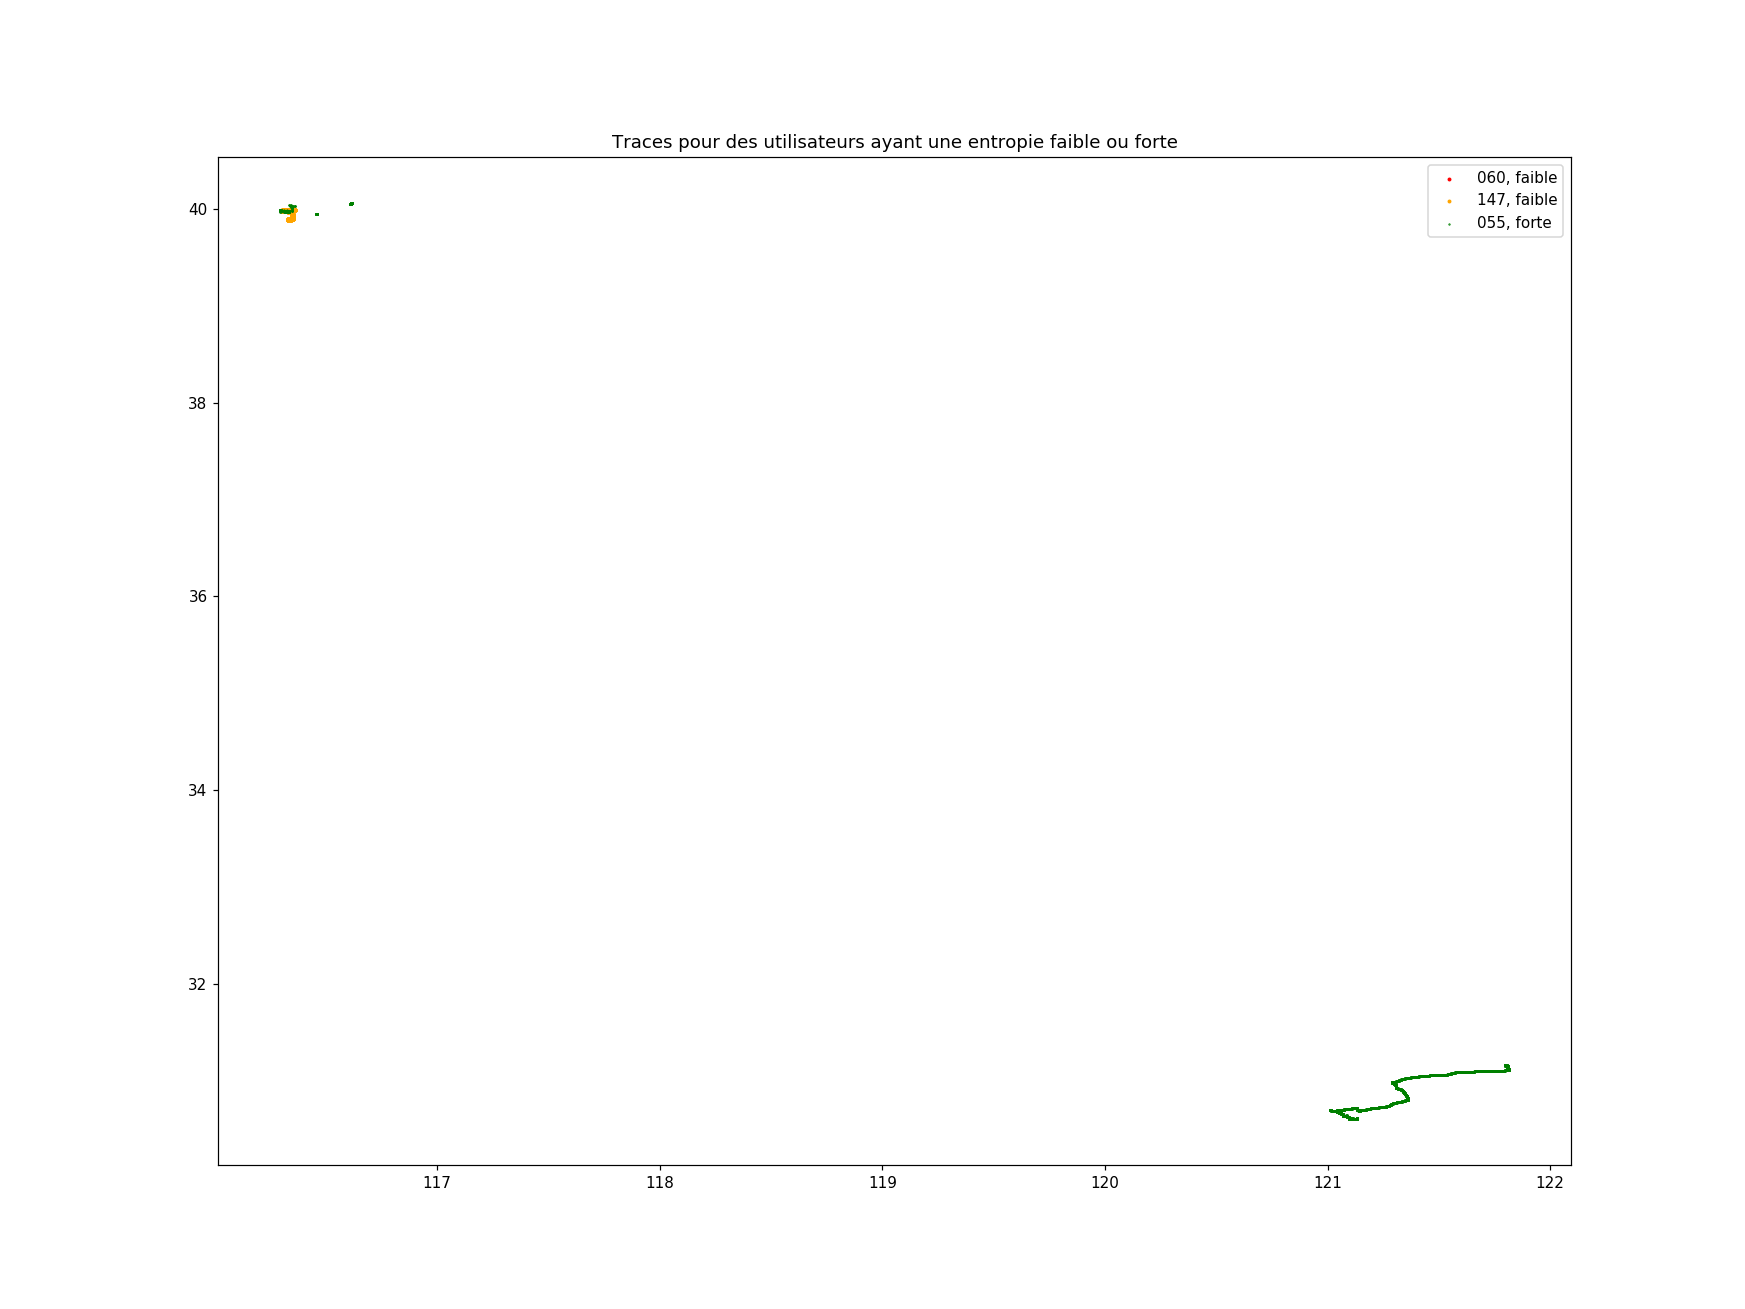

In [143]:
fig = plt.figure(num=None, figsize=(16,12))
ax1 = fig.add_subplot(111)

ax1.scatter(pos['060'][:, 1], pos['060'][:, 0], marker='.', s=10, c='r', label='060, faible')
ax1.scatter(pos['147'][:, 1], pos['147'][:, 0], marker='.', s=10, c='orange', label='147, faible')
ax1.scatter(pos['055'][:, 1], pos['055'][:, 0], marker='.', s=1, c='g', label='055, forte')
#ax1.scatter(pos['153'][:, 1], pos['153'][:, 0], s=1, c='b', label='153, forte')
plt.legend(loc='upper right');
plt.title('Traces pour des utilisateurs ayant une entropie faible ou forte')
plt.savefig("output/scatterplot_faible_vs_forte_entropie_2D")
plt.show()

### En arrondissant légèrement les valeurs

In [69]:
np.round(pos['000'], 4)

array([[  39.9847,  116.3184],
       [  39.9847,  116.3184],
       [  39.9847,  116.3184],
       ..., 
       [  40.0004,  116.3272],
       [  40.0005,  116.3271],
       [  40.0005,  116.3271]])

In [75]:
entropies_br = {}
for key, value in pos.items():
    print(key, end=' ')
    entropies_br[key] = entropie_2D(np.round(value, 4))

000 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018 019 020 021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053 054 055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089 090 091 092 093 094 095 096 097 098 099 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 

<IPython.core.display.Javascript object>


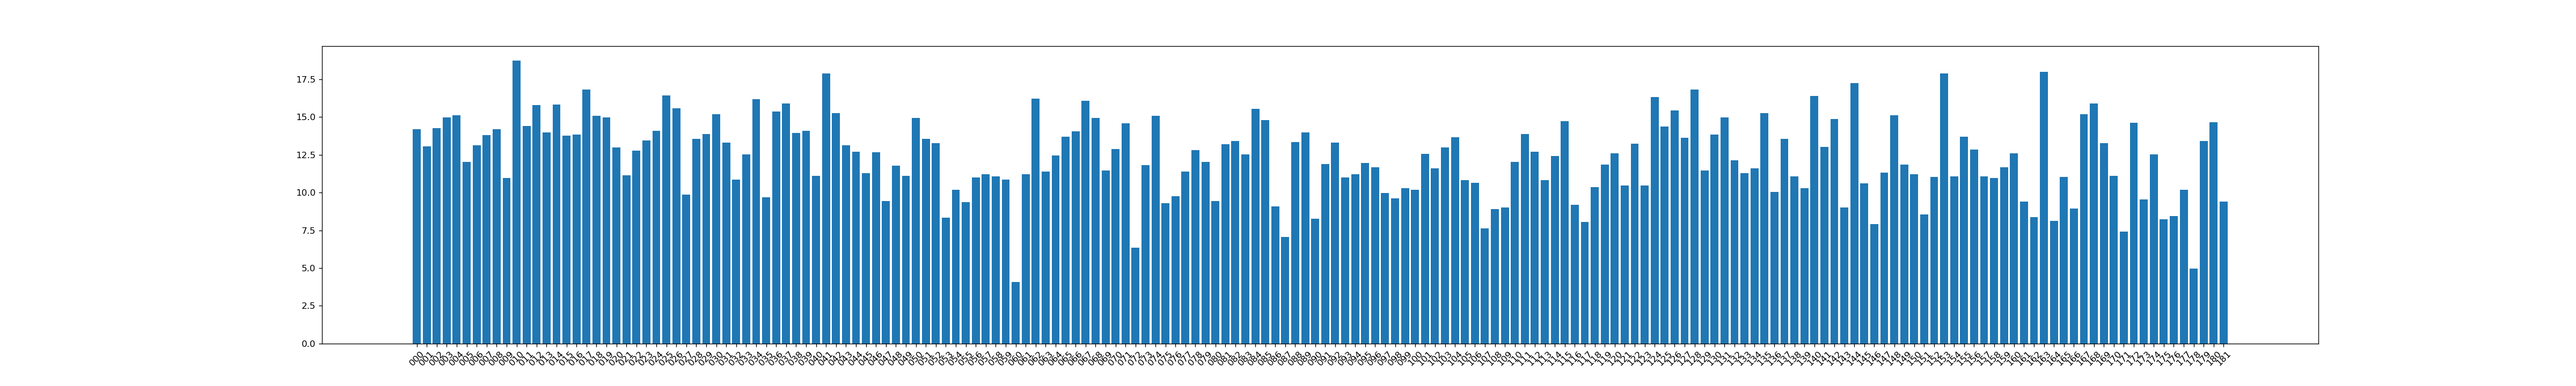

In [76]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(entropies_br)), list(entropies_br.values()), align='center')
plt.xticks(range(len(entropies_br)), list(entropies_br.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_both_rounded", format="jpg")

In [77]:
ordered_entropies_br = collections.OrderedDict(sorted(entropies_br.items(), key=lambda t: t[1]))

<IPython.core.display.Javascript object>


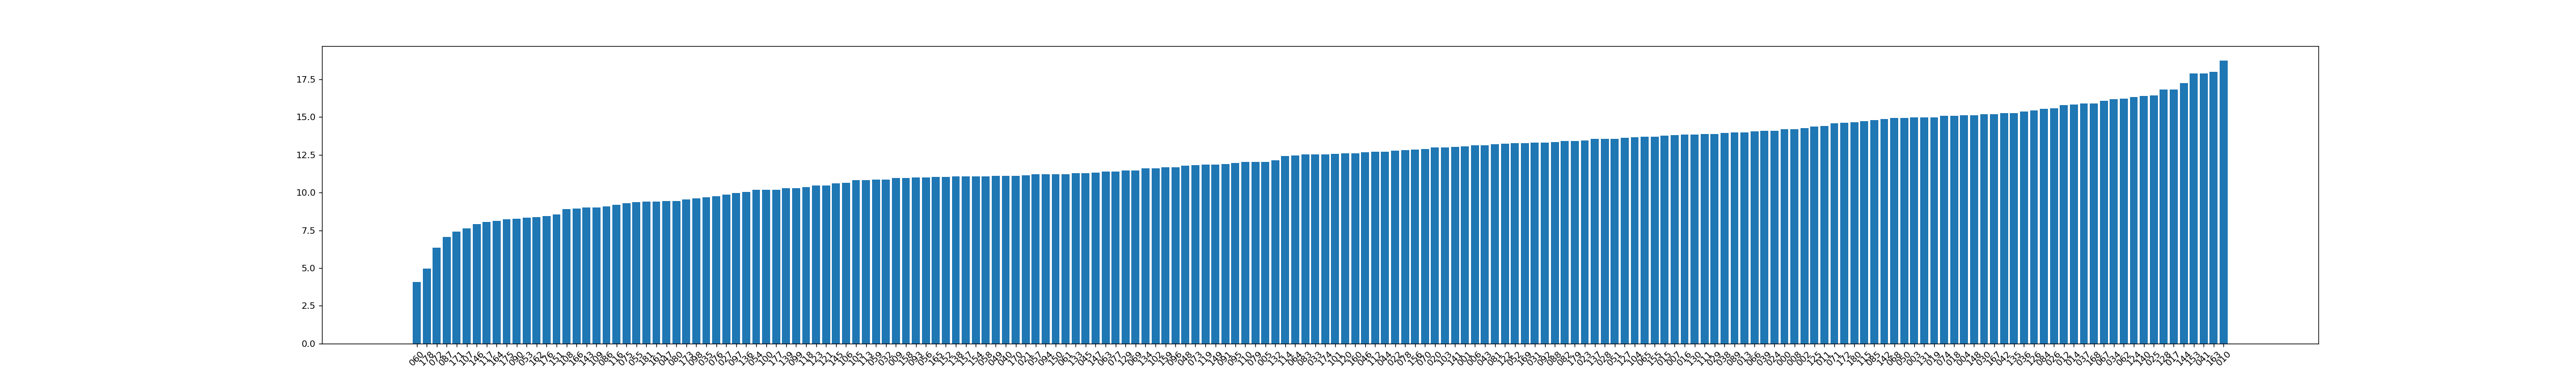

In [78]:
plt.figure(num=None, figsize=(40,6))
plt.bar(range(len(ordered_entropies_br)), list(ordered_entropies_br.values()), align='center')
plt.xticks(range(len(ordered_entropies_br)), list(ordered_entropies_br.keys()), rotation=45)
plt.savefig("output/entropie_spatiale_sorted_both_round", format="jpg")

<IPython.core.display.Javascript object>


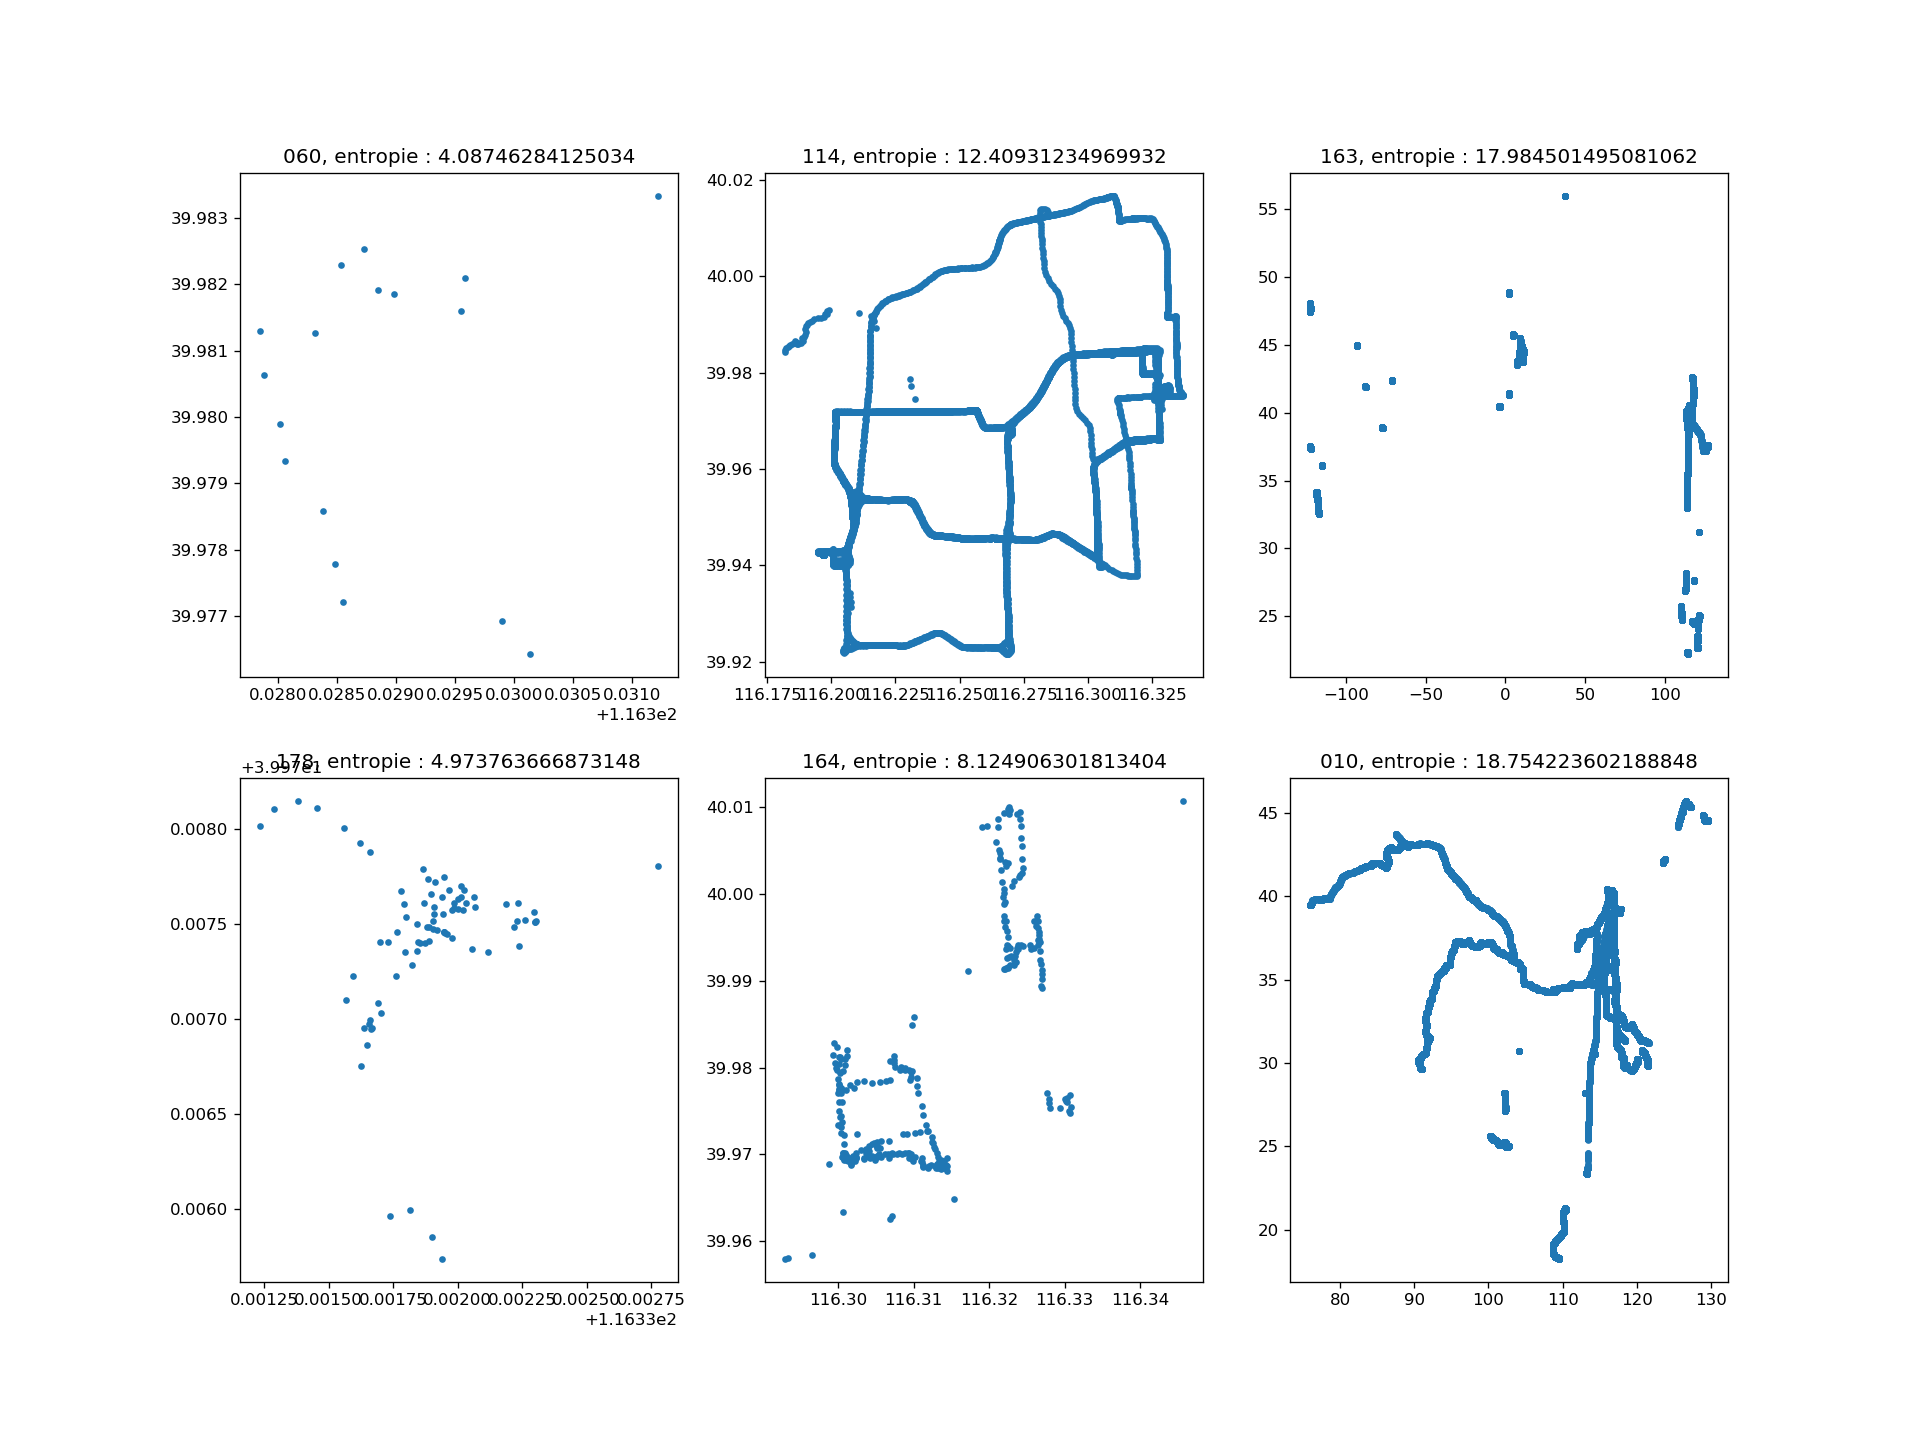

In [85]:
a_ploter = ['060', '114', '163', '178', '164', '010']
plt.figure(num=None, figsize=(16,12))
for i,num in enumerate(a_ploter):
    plt.subplot(2,3, i+1)
    plt.title(num+', entropie : '+str(entropies_br[num]))
    plt.plot(pos[num][:, 1], pos[num][:, 0], '.')
plt.savefig("output/entropie_spatiale_both_round_points_users_extremes", format="jpg")

<IPython.core.display.Javascript object>


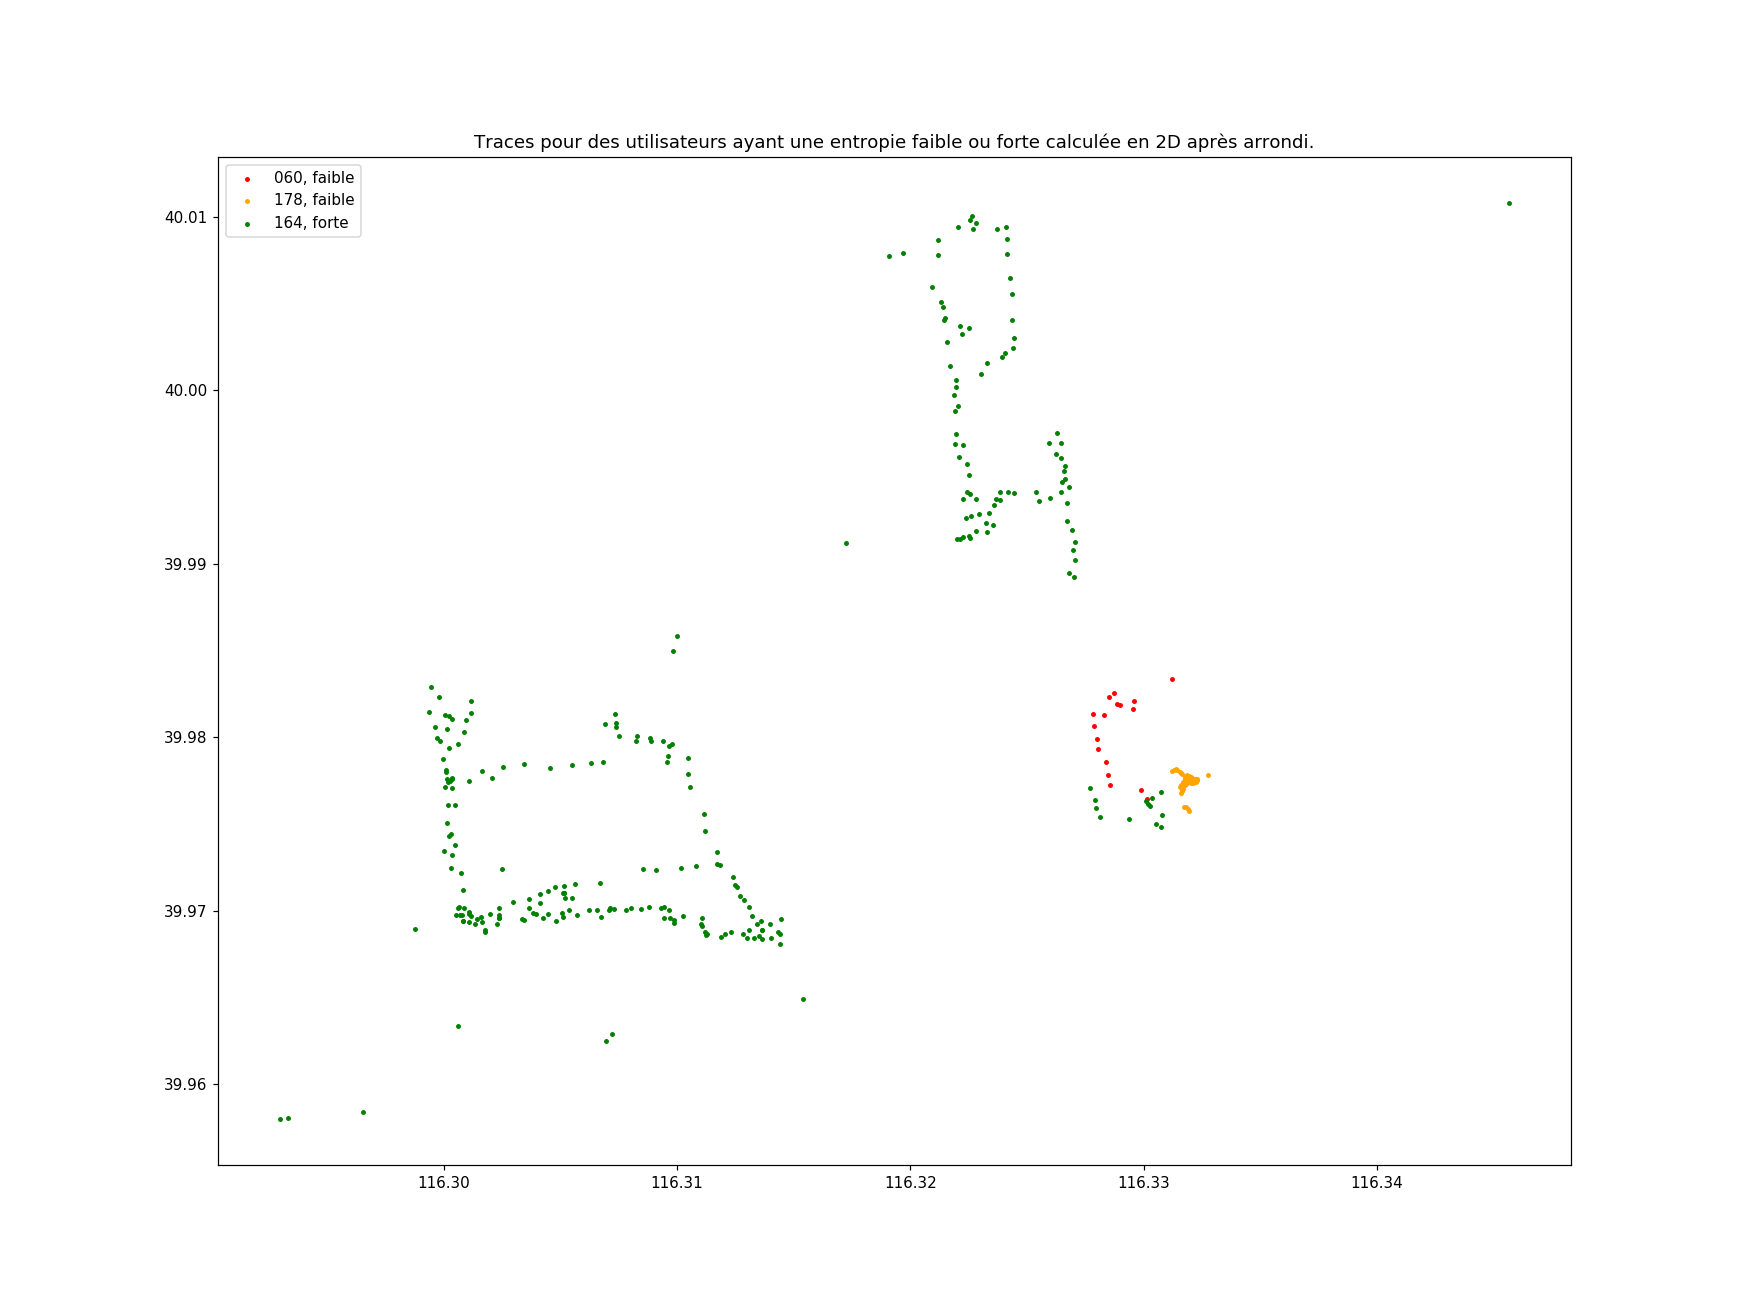

In [144]:
fig = plt.figure(num=None, figsize=(16,12))
ax1 = fig.add_subplot(111)

ax1.scatter(pos['060'][:, 1], pos['060'][:, 0], marker='.', s=20, c='r', label='060, faible')
ax1.scatter(pos['178'][:, 1], pos['178'][:, 0], marker='.', s=20, c='orange', label='178, faible')
ax1.scatter(pos['164'][:, 1], pos['164'][:, 0], marker='.', s=20, c='g', label='164, forte')
#ax1.scatter(pos['010'][:, 1], pos['010'][:, 0], s=1, c='b', label='010')
plt.legend(loc='upper left');
plt.title('Traces pour des utilisateurs ayant une entropie faible ou forte calculée en 2D après arrondi.')
plt.savefig("output/scatterplot_faible_vs_forte_entropie_2D_arrondis")
plt.show()

## Entropie temporelle